# flood-analysis

Analysing the impact of climate change on Queensland Cattle markets, intermediated by increased flood events


## Question 1: Understand the shape of flooding data over time


**Hypotheses**
- Increase in river discharge means increased flood risk across both cities
- The frequency of rainfall has increased from 1990 - 2020
- The frequency of floods has increased from 1990 - 2020

**Definitions**
- River discharge is the volume of water flowing through a river channel. This is the total volume of water flowing through a channel at any given point and is measured in cubic metres per second (cumecs). The discharge from a drainage basin depends on precipitation, evapotranspiration and storage factors. Drainage basin discharge = precipitation – evapotranspiration +/- changes in storage.

**Data sources**
- Open Meteo Flood API (GloFAS), 1990-2020, Queensland
- https://www.internetgeography.net/topics/river-discharge/

**Visualisation**
- River discharge time series
- Rainfall over time series


In [1]:
#Import dependencies

import queryscripts as qs
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import datetime 


In [2]:
# Read and display csv file
flood_data = pd.read_csv("Data/flooddata.csv")
flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,5.97,33.20
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,6.23,31.58
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,6.46,30.41
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,7.28,29.48
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,4.71,28.85


In [3]:
flood_data.location.unique()

array(['Brisbane', 'Townsville', 'Rockhampton'], dtype=object)

In [4]:
#Change date date format
flood_data["date"] = flood_data["date"].astype("datetime64[ns]")

In [5]:
#Create year series
flood_data['Year'] = flood_data["date"].dt.strftime("%Y")
flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge,Year
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,5.97,33.20,1990
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,6.23,31.58,1990
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,6.46,30.41,1990
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,7.28,29.48,1990
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,4.71,28.85,1990


In [6]:
# Group the data by year and location
flood_data_yearly = flood_data.groupby("Year").mean(numeric_only=True)
flood_data_yearly.head()


,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration,river_discharge
Year,,,,,,,,,,
1990,-23.509667,150.307333,26.281005,17.956256,21.716895,3.076712,3.219178,16.431781,4.095187,268.974950
1991,-23.509667,150.307333,26.769772,18.070502,22.048584,2.079361,2.764384,15.901826,4.088767,623.549315
1992,-23.509667,150.307333,26.498543,18.124044,21.934699,1.805191,2.595628,15.569217,4.119308,35.107650
1993,-23.509667,150.307333,26.522922,18.412511,22.085845,1.189589,2.369863,16.222557,4.083370,12.788301
1994,-23.509667,150.307333,26.638174,17.741918,21.780913,1.182374,2.136986,16.605662,4.306785,20.529178


In [7]:
# Create data set for Year, flood data - river discharge
year_flood = flood_data[["Year", "river_discharge", "location"]]
year_flood.head()

,Year,river_discharge,location
0,1990,33.20,Brisbane
1,1990,31.58,Brisbane
2,1990,30.41,Brisbane
3,1990,29.48,Brisbane
4,1990,28.85,Brisbane


In [8]:
# Check the data type for the series
year_flood.dtypes

Year                object
river_discharge    float64
location            object
dtype: object

In [9]:
# Convert Year values to integer
# year_flood = year_flood.apply[int(pd.to_numeric, errors="coerce")]

year_flood['Year'] = year_flood['Year'].astype('int')


/var/folders/mp/sc4qw2553bb18b1y2my327zc0000gn/T/ipykernel_71019/3942185702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_flood['Year'] = year_flood['Year'].astype('int')


In [10]:
# Filter the flood data by each location starting with Brisbane
bris_flood_year = year_flood.loc[year_flood["location"] == "Brisbane"]
bris_flood_year.head()


,Year,river_discharge,location
0,1990,33.20,Brisbane
1,1990,31.58,Brisbane
2,1990,30.41,Brisbane
3,1990,29.48,Brisbane
4,1990,28.85,Brisbane


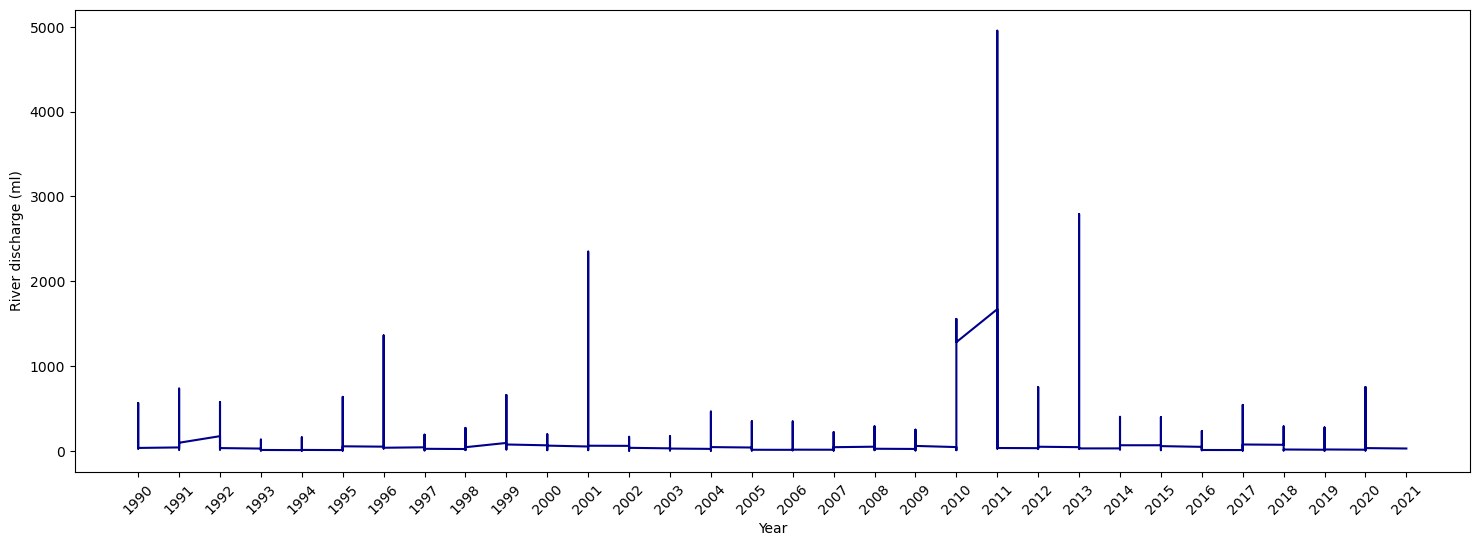

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot the flood data for Brisbane by year
x_values = bris_flood_year ["Year"]
bris_y_values = bris_flood_year["river_discharge"]
fig = plt.figure(figsize=(18,6))
plt.plot(x_values,bris_y_values, color="darkblue")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("River discharge (ml)")
plt.savefig("visuals/flood_by_year.png")
plt.show()
plt.tight_layout()

In [12]:
# Filter the flood data for Townsville
townsville_flood_year = year_flood.loc[year_flood["location"] == "Townsville"]
townsville_flood_year.head()


,Year,river_discharge,location
11324,1990,226.51,Townsville
11325,1990,256.63,Townsville
11326,1990,264.46,Townsville
11327,1990,259.02,Townsville
11328,1990,246.17,Townsville


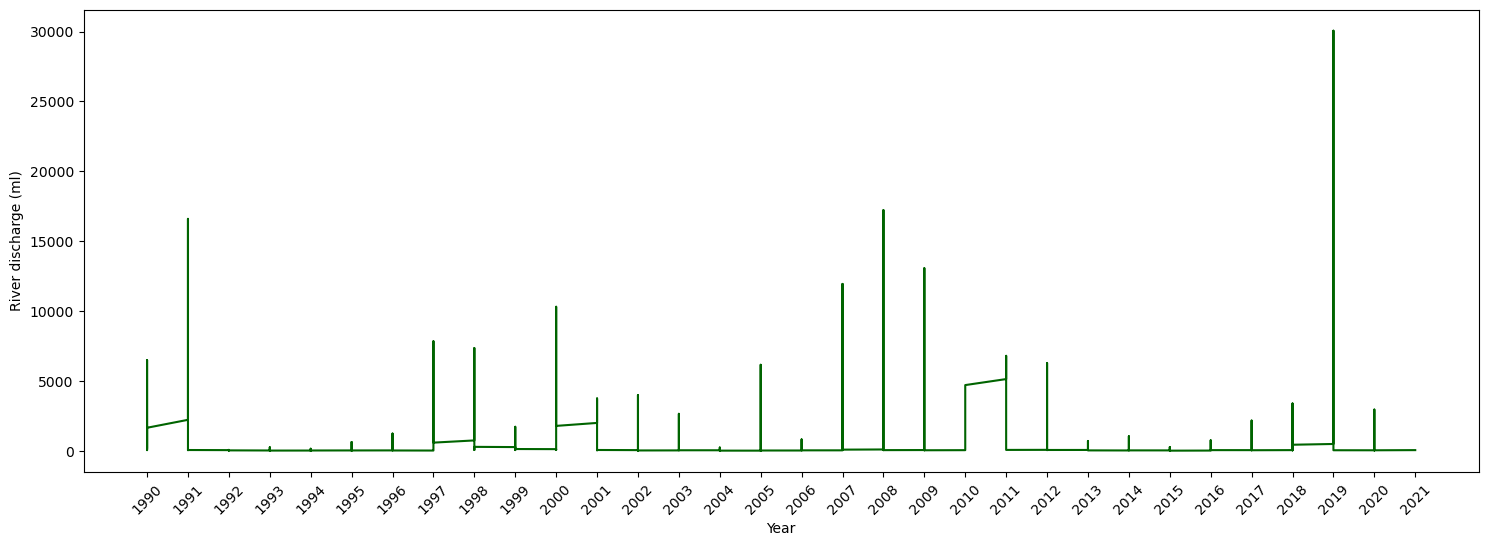

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the flood data for Townsville by year
x_values = townsville_flood_year ["Year"]
townsville_y_values = townsville_flood_year["river_discharge"]
fig = plt.figure(figsize=(18,6))
plt.plot(x_values, townsville_y_values, color="darkgreen")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("River discharge (ml)")
plt.savefig("visuals/flood_by_year.png")

plt.show()
plt.tight_layout()

In [14]:
year_flood['Year'] = year_flood['Year'].astype('int')

/var/folders/mp/sc4qw2553bb18b1y2my327zc0000gn/T/ipykernel_71019/1973340520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_flood['Year'] = year_flood['Year'].astype('int')


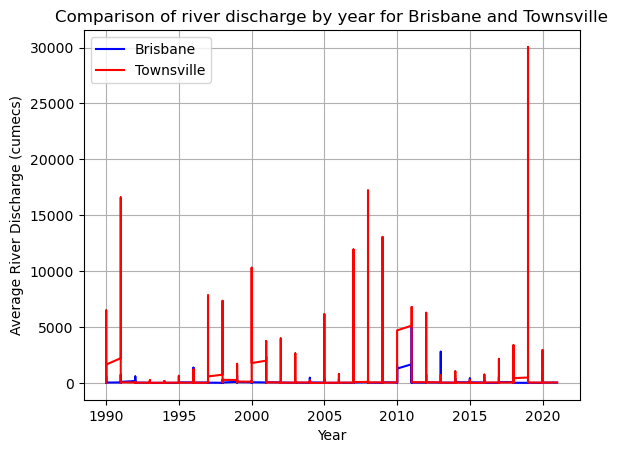

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot both on the same chart
plt.plot(x_values, bris_y_values, "-b", label="Brisbane")
plt.plot(x_values, townsville_y_values, "-r", label="Townsville")
plt.legend(loc="upper left")

#Add plot grid
plt.grid(True)

#Add plot labels
plt.title("Comparison of river discharge by year for Brisbane and Townsville")
plt.xlabel("Year")
plt.ylabel("Average River Discharge (cumecs)")

#Display the line graph
plt.show()
plt.tight_layout()

#Save as a png
plt.savefig("visuals/flood_comparison.png")

In [16]:
#Create dataset for Year vs Rainfall for each of the cities
# Create data set for Year, flood data - river discharge
year_rainfall = flood_data[["Year", "precipitation_sum", "location"]]
year_rainfall.head()

,Year,precipitation_sum,location
0,1990,0.0,Brisbane
1,1990,0.0,Brisbane
2,1990,0.0,Brisbane
3,1990,0.0,Brisbane
4,1990,0.0,Brisbane


In [17]:
# Check the data type for the series
year_rainfall.dtypes

Year                  object
precipitation_sum    float64
location              object
dtype: object

In [18]:
# Convert Year values to integer
year_rainfall['Year'] = year_rainfall['Year'].astype('int')

/var/folders/mp/sc4qw2553bb18b1y2my327zc0000gn/T/ipykernel_71019/2313158848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_rainfall['Year'] = year_rainfall['Year'].astype('int')


In [19]:
# Filter the rainfall data by each location starting with Brisbane
bris_rainfall_year = year_rainfall.loc[year_rainfall["location"] == "Brisbane"]
bris_rainfall_year.head()

,Year,precipitation_sum,location
0,1990,0.0,Brisbane
1,1990,0.0,Brisbane
2,1990,0.0,Brisbane
3,1990,0.0,Brisbane
4,1990,0.0,Brisbane


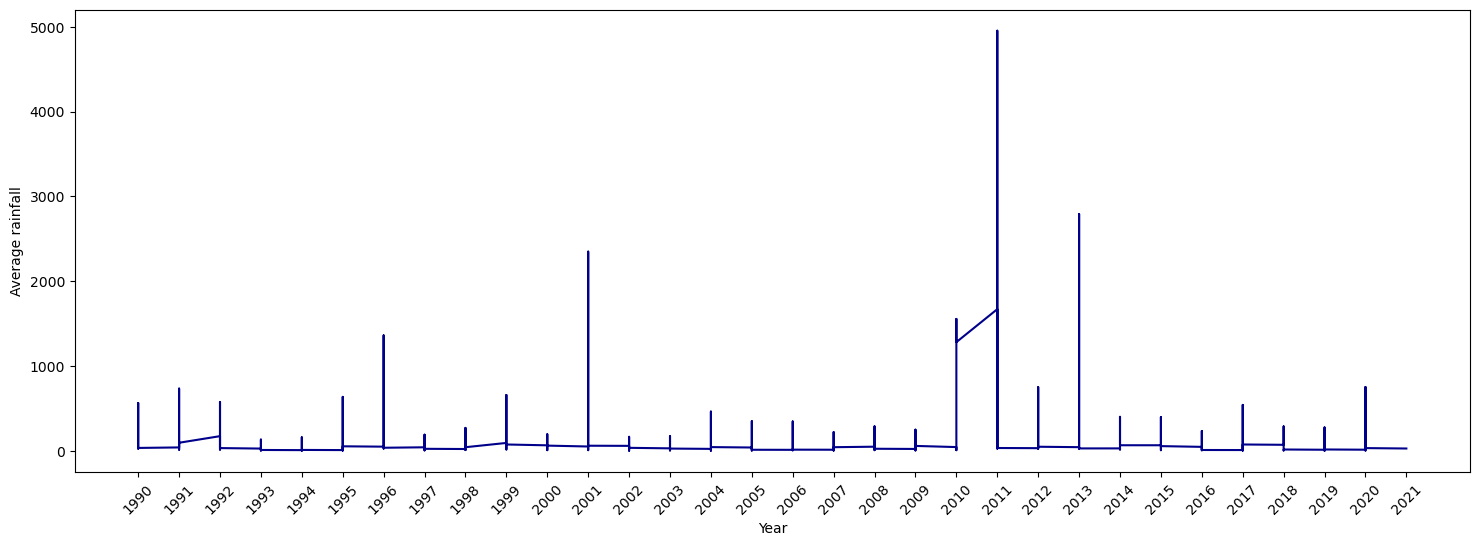

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the rainfall data for Brisbane by year
# Add the values
x_values = bris_rainfall_year ["Year"]
bris_rainfall_y_values = bris_rainfall_year["precipitation_sum"]

# Create the graph
fig = plt.figure(figsize=(18,6))
plt.plot(x_values,bris_y_values, color="darkblue")

#Create x ticks
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)

# Create labels and title
plt.xlabel("Year")
plt.ylabel("Average rainfall")
plt.show()
plt.tight_layout()

In [21]:
# Filter the rainfall data by each location starting with Townsville
townsville_rainfall_year = year_rainfall.loc[year_rainfall["location"] == "Townsville"]
townsville_rainfall_year.head()

,Year,precipitation_sum,location
11324,1990,0.0,Townsville
11325,1990,0.0,Townsville
11326,1990,0.0,Townsville
11327,1990,0.0,Townsville
11328,1990,0.5,Townsville


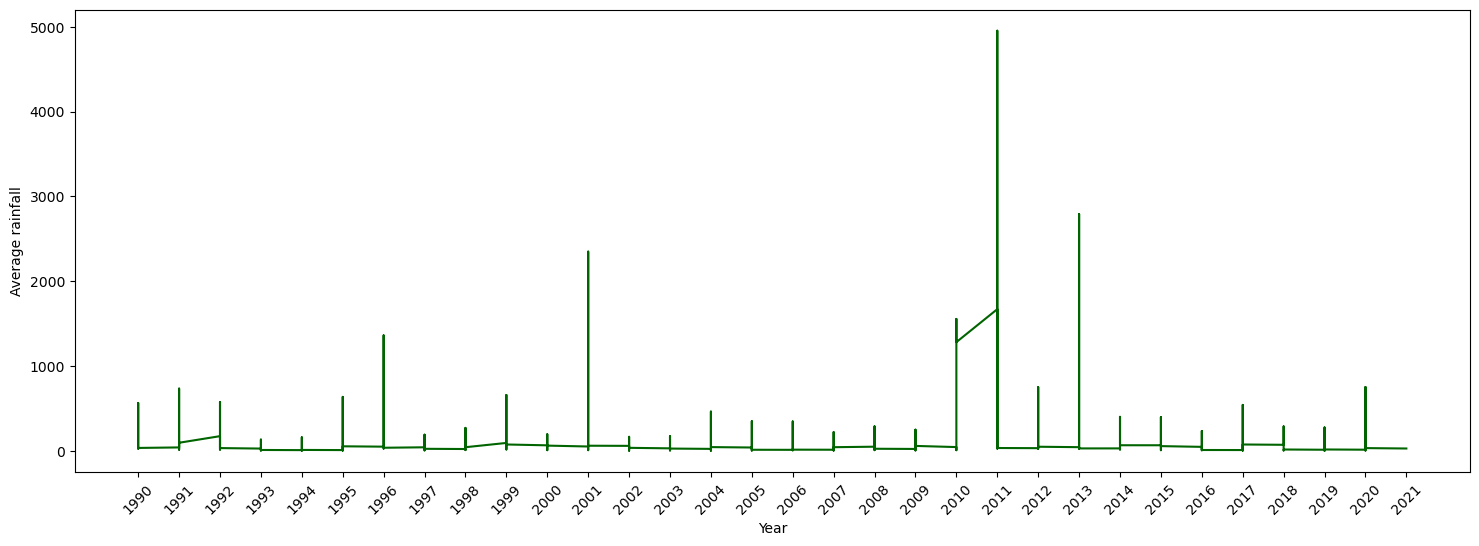

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the rainfall data for Townsville by year
x_values = townsville_rainfall_year ["Year"]
townsville_rainfall_y_values = townsville_rainfall_year["precipitation_sum"]
fig = plt.figure(figsize=(18,6))
plt.plot(x_values,bris_y_values, color="darkgreen")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("Average rainfall")
plt.show()
plt.tight_layout()

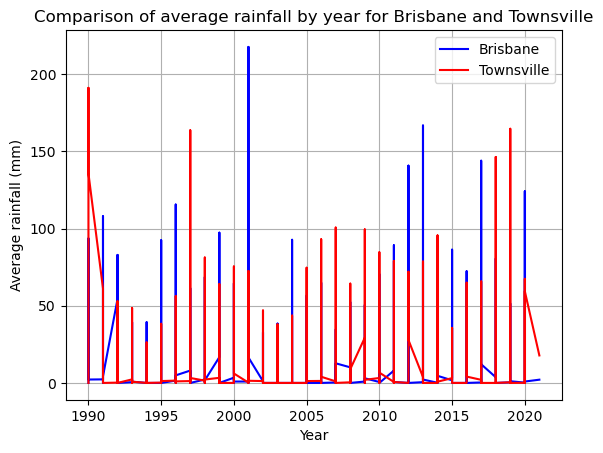

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the two cities and compare rainfall for each
# Plot both on the same chart
plt.plot(x_values, bris_rainfall_y_values, "-b", label="Brisbane")
plt.plot(x_values, townsville_rainfall_y_values, "-r", label="Townsville")
plt.legend(loc="upper right")

#Add plot grid
plt.grid(True)

#Add plot labels
plt.title("Comparison of average rainfall by year for Brisbane and Townsville")
plt.xlabel("Year")
plt.ylabel("Average rainfall (mm)")

#Display the line graph
plt.show()
plt.tight_layout()

#Save as a png
plt.savefig("visuals/rainfall_comparison.png")

## Final analysis


### - The average rainfall for Brisbane is higher than Townsville

### - The average river discharge which can be the assumed as flood risk is greater in Townsville compared to Brisbane even though the average rainfall is higher in Brisbane

### - We can conclude a null hypothesis that increased rainfall equals increased river discharge and therefore flood risk for the two cities

### - River discharge has not increased in severity over time, there is no pattern for higher than average river discharge for either city resulting in a null hypothesis

### - Rainfall average mm has increased above 75mm in the last 10 years compared to previous years where there were peaks above 150 and dips below 50. Average rainfall has been consistently more severe from 2010 - 2020 compared with 1990 to 2010 where there are 3 sharp peaks and lower average rainfall.